In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
cur_dir = os.getcwd()
pkg_rootdir = os.path.dirname(cur_dir)

print(pkg_rootdir)

/Users/mark/Codes/MyOpenSourceCodes/MachineLearning


In [3]:
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

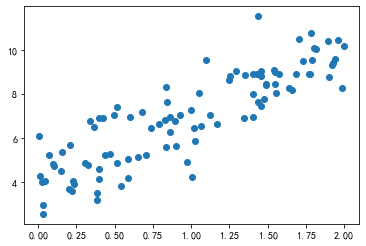

In [4]:
plt.scatter(x, y)

In [5]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

##### 对 J 求导

In [6]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [7]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        cur_iter += 1

    return theta

In [8]:
X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1,1)])

initial_theta = np.zeros(X_b.shape[1])

eta = 0.01

In [9]:
theta = gradient_descent(X_b, y, initial_theta, eta)
print(theta)

[4.02145786 3.00706277]


##### 使用封装的线性回归算法

In [10]:
import sys
import os
sys.path.append(os.path.dirname(sys.path[0]))

In [11]:
from LibML.linear_regression import LinearRegression

X = x.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [12]:
print(lin_reg.coef)

[3.00706277]


In [13]:
print(lin_reg.intercept)

4.021457858204859
